<a href="https://colab.research.google.com/github/YuehMintTai/RPython/blob/main/Class07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#三軍總醫院北投分院統計及實驗設計課程之七
## 2021/7/9
## ytai1123@gmail.com
### 使用方法:


1.   使用gmail帳號登入
2.   按"執行階段" -->"全部執行" 以執行全部內容, 若要個別執行可點選每格程式左方箭頭或按 Control + Enter 鍵執行。

In [1]:
##0-1
!git clone https://github.com/YuehMintTai/RPython.git

Cloning into 'RPython'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [2]:
##0-2
!pip install rpy2

In [4]:
##0-3
%load_ext rpy2.ipython

In [5]:
##6-1
%%R
myData<-read.csv('RPython/samples.csv')
tail(myData,1)

    SID 性別 年齡 入伍前職業 教育程度 婚姻狀況 皆無過去病史01 早產兒01
188   4    1   25         商        4        1              1        0
    頭部曾受傷01 發展遲緩01 注意力不足過動症01 癲癇01 癲癇服藥治療 癲癇服藥期間
188            0          0                  0      0            0            0
    軍種 軍階 役別 入伍至今_年 聽過自殺課程_次 求助心輔_次 求助精神科_次
188    1    1    2         0.5               1           0             2
    使用1995_次 使用24h專線_次 特殊狀況 父母婚姻狀態 自殺意念_bsrs6 B型肝炎01
188           0              0        4            4              4         0
    C型肝炎01 氣喘史01 過敏史01 心臟病史01 高血壓01 醣尿病01 甲狀腺01 類風濕01
188         0        1        1          0        0        0        1        0
    重大意外01 自殺意念01 透露父母 透露手足 透露好友 透露同儕 透露長官 透露心輔
188          1          1        0        0        0        0        0        0
    透露醫師 拒告父母 拒告手足 拒告好友 拒告同儕 拒告長官 拒告心輔 拒告醫師
188        0        1        1        1        1        1        1        1
    BSRS總分 BSRSR總分 過動症總分 Inattention Impulsivity opposition depression
188       20         5         18           9           

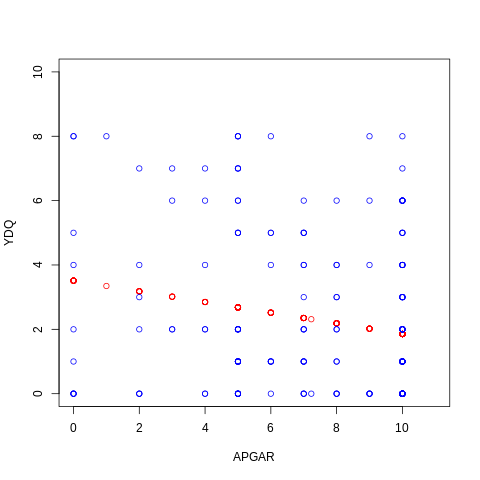

In [45]:
##7-1-1 繪出預測值(predicted_value)和實際值的關係圖
%%R
formula1<-'網路成癮分數YDQ~家庭滿意度apgar'
model1<-glm(formula1,myData,family='gaussian')
predicted_value1<-predict(model1,myData)
predicted_value1
plot(myData$家庭滿意度apgar,predicted_value1,col='red',
     xlab='APGAR',ylab='YDQ',
     xlim=range(c(0,11)),ylim=range(c(0,10)))
points(myData$家庭滿意度apgar, myData$網路成癮分數YDQ,col='blue')

In [ ]:
%%R ##下載 rsq package
install.packages('rsq')

In [44]:
##7-1-2 ##計算R-square
%%R
library(rsq)
print(rsq(model1))
print(rsq(model1,adj=TRUE))
with(summary(model1),1-deviance/null.deviance)

[1] 0.04158183
[1] 0.03642905
[1] 0.04158183


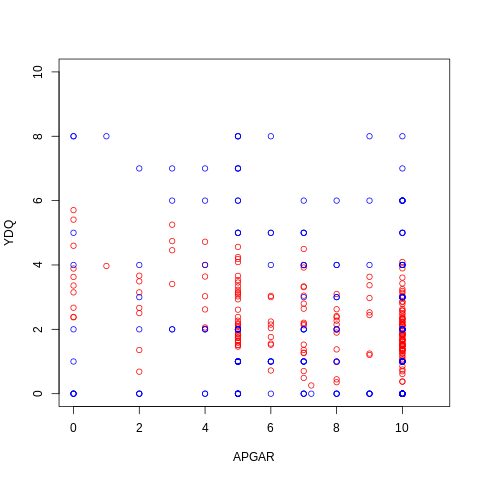

In [55]:
##7-2-2 ##使用較多X的model...
%%R
formula2<-'網路成癮分數YDQ~as.factor(性別)+家庭滿意度apgar+年齡+BSRS總分+anxiety+depression+burdensome+belonging'
model2<-glm(formula2, myData, family='gaussian')
predicted_value2<-predict(model2,myData)
plot(myData$家庭滿意度apgar,predicted_value2,col='red',
     xlab='APGAR',ylab='YDQ',
     xlim=range(c(0,11)),ylim=range(c(0,10)))
points(myData$家庭滿意度apgar, myData$網路成癮分數YDQ,col='blue')

In [ ]:
%%R
plot(myData$網路成癮分數YDQ,predicted_value2,col='blue')
points(myData$網路成癮分數YDQ,predicted_value1,col='green')

In [54]:
##7-2-2 ##計算R-square
%%R
library(rsq)
print(rsq(model2))
print(rsq(model2,adj=TRUE))
with(summary(model2),1-deviance/null.deviance)

[1] 0.1879277
[1] 0.1516339
[1] 0.1879277
